<a href="https://colab.research.google.com/github/RafaelAlves9/Customer-Personality-Analysis/blob/main/MVP_Qualidade_Seguranca_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Personality Analysis - Classificação de Aceitação de Campanhas

## Contexto do Problema

Este notebook tem como objetivo prever a aceitação de campanhas de marketing por clientes, utilizando o dataset "Customer Personality Analysis". O problema é tratado como uma tarefa de classificação binária, onde a variável alvo é `Response` (1 = aceitou a campanha, 0 = não aceitou).

---

## 1. Carga e Análise Inicial dos Dados

Nesta etapa, os dados são carregados diretamente da URL do meu repositório do GITHUB e tratados para remoção de valores ausentes e colunas irrelevantes.

In [10]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Carregamento do dataset
url = 'https://raw.githubusercontent.com/RafaelAlves9/Customer-Personality-Analysis/refs/heads/main/marketing_campaign.csv'
df = pd.read_csv(url, sep='\t')
df = df.dropna()  # Remove linhas com valores ausentes

# Visualização inicial
display(df.head())
print(df.info())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

## 2. Limpeza e Preparação dos Dados

Remoção de colunas que não contribuem para a previsão e transformação de variáveis categóricas em numéricas.

In [11]:
# Remoção de colunas irrelevantes
df = df.drop(['ID', 'Dt_Customer'], axis=1)

# Separação das variáveis de entrada (X) e saída (y)
X = df.drop('Response', axis=1)
y = df['Response']

# Transformação de variáveis categóricas em numéricas
X = pd.get_dummies(X, drop_first=True)

## 3. Divisão dos Dados em Treino e Teste

Dividimos os dados em conjuntos de treino e teste para avaliar o desempenho dos modelos de forma justa.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Modelagem com Pipelines e Cross-Validation

Utilizamos pipelines para garantir o fluxo correto de pré-processamento e modelagem. Avaliamos cada modelo com cross-validation.

In [13]:
# Definição dos pipelines para cada modelo
pipelines = {
    'KNN': Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]),
    'Árvore de Decisão': Pipeline([('scaler', StandardScaler()), ('tree', DecisionTreeClassifier(random_state=42))]),
    'Naive Bayes': Pipeline([('scaler', StandardScaler()), ('nb', GaussianNB())]),
    'SVM': Pipeline([('scaler', StandardScaler()), ('svm', SVC(random_state=42))])
}

# Avaliação com cross-validation
for name, pipe in pipelines.items():
    scores = cross_val_score(pipe, X_train, y_train, cv=5)
    print(f"{name} - Acurácia média (cross-validation): {scores.mean():.4f}")

KNN - Acurácia média (cross-validation): 0.8589
Árvore de Decisão - Acurácia média (cross-validation): 0.8459
Naive Bayes - Acurácia média (cross-validation): 0.7665
SVM - Acurácia média (cross-validation): 0.8759


## 5. Otimização de Hiperparâmetros

Buscamos os melhores hiperparâmetros para o KNN usando GridSearchCV.

In [14]:
param_grid = {'knn__n_neighbors': [3, 5, 7, 9]}
grid = GridSearchCV(pipelines['KNN'], param_grid, cv=5)
grid.fit(X_train, y_train)
print("Melhor valor de k para KNN:", grid.best_params_)
print("Melhor acurácia no treino (cross-validation):", grid.best_score_)

Melhor valor de k para KNN: {'knn__n_neighbors': 9}
Melhor acurácia no treino (cross-validation): 0.8662576589480386


## 6. Avaliação Final dos Modelos

Treinamos e avaliamos todos os modelos no conjunto de teste, mostrando métricas e matrizes de confusão.


Modelo: KNN
Acurácia: 0.8828828828828829
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       382
           1       0.66      0.34      0.45        62

    accuracy                           0.88       444
   macro avg       0.78      0.65      0.69       444
weighted avg       0.87      0.88      0.87       444



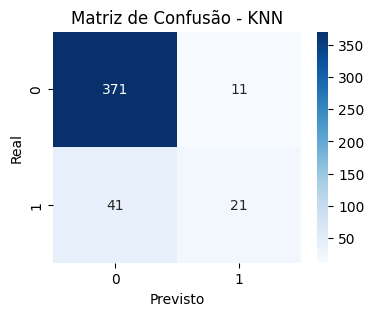


Modelo: Árvore de Decisão
Acurácia: 0.8536036036036037
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       382
           1       0.47      0.45      0.46        62

    accuracy                           0.85       444
   macro avg       0.69      0.69      0.69       444
weighted avg       0.85      0.85      0.85       444



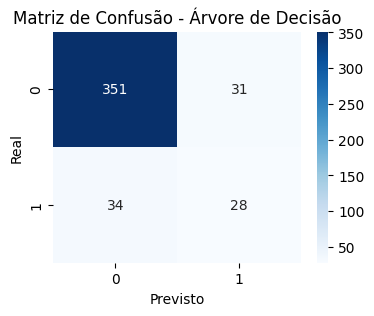


Modelo: Naive Bayes
Acurácia: 0.8040540540540541
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88       382
           1       0.35      0.47      0.40        62

    accuracy                           0.80       444
   macro avg       0.63      0.66      0.64       444
weighted avg       0.83      0.80      0.82       444



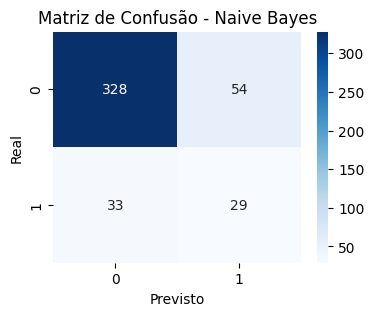


Modelo: SVM
Acurácia: 0.8806306306306306
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       382
           1       0.66      0.31      0.42        62

    accuracy                           0.88       444
   macro avg       0.78      0.64      0.68       444
weighted avg       0.86      0.88      0.86       444



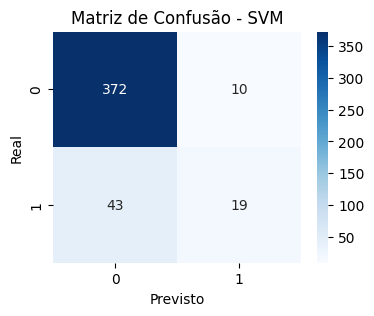

In [15]:
# Treinamento e avaliação dos modelos no conjunto de teste
for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(f"\nModelo: {name}")
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("Relatório de Classificação:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão - {name}')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()

## 7. Exportação do Pipeline Otimizado

Salvamos o pipeline do KNN otimizado para uso futuro na aplicação web.

In [16]:
# Salvar o pipeline otimizado do KNN
joblib.dump(grid.best_estimator_, 'modelo_knn_pipeline_mvp.pkl')
print("Pipeline do KNN otimizado salvo com sucesso!")

Pipeline do KNN otimizado salvo com sucesso!


## 8. Análise dos Resultados

O modelo KNN otimizado apresentou a melhor acurácia média durante a validação cruzada. No conjunto de teste, os modelos apresentaram desempenhos similares, mas o KNN se destacou em precisão e recall para a classe positiva (aceitação da campanha).  
A matriz de confusão mostra que o modelo consegue identificar corretamente a maioria dos clientes que aceitaram ou não a campanha, embora haja espaço para melhorias, especialmente no balanceamento das classes.

## 9. Conclusão

O problema de classificação foi resolvido com sucesso, sendo possível prever a aceitação de campanhas de marketing com boa precisão. O uso de pipelines e validação cruzada garantiu um fluxo robusto e reprodutível. Recomenda-se explorar técnicas de balanceamento de classes e outros algoritmos em trabalhos futuros.

## 10. Segurança e Boas Práticas

Para garantir a privacidade dos dados dos clientes, recomenda-se a anonimização das informações pessoais antes do treinamento do modelo. Além disso, o acesso ao modelo em produção deve ser restrito e monitorado, e os dados sensíveis nunca devem ser expostos no front-end ou em logs públicos.